# 期权定价

## 期权理论

期权，是指一种合约，源于十八世纪后期的美国和欧洲市场，该合约赋予持有人在某一特定日期或该日之前的任何时间以固定价格购进或售出一种资产的权利。

期权会约定一个执行价格X，看涨看跌期权有所不同：
- 看涨期权，也叫call option，指未来可以以X价格买入该股票，所以如果股票价格超过X，期权就可以行权获取股票，然后到市场卖出获取收入
- 看跌期权，也叫put optopn，指未来可以以X价格卖出该股票，所以如果股票价格小于X，期权就可以行权直接卖给期权的买方获取收入

期权的买方和卖方的权利义务是：
- 买方，也叫long方，会支付期权费用，但是可以决定不行权，所以损失最多就是期权费，收益相对无限  
- 卖方，也叫short/written方，会收取期权费，但是如果买方行权自己必须被动接受，所以损失相对无限，但是收益有限。为了确定能够被行权，卖方还要支付一定的保证金，而买方不太需要

期权分为看涨期权和看跌期权，由于期权的买卖方权利是不对等的，所以能够形成不同的四象限收益：
- Long call: $c_T=Max (0, S_T-X) – c_0$
- Short call: $c_T=-Max (0, S_T-X) + c_0$
- Long put: $p_T= Max (0, X-S_T) – p_0$
- Short put: $p_T= -Max (0, X-S_T)+ p_0$  

以上的S是行权日的股票价格，c/p是购买看涨/看跌期权时的支付的费用

![](./期权公式定价.assets/期权收益.png)

## 离散时间定价-二叉树

在早期，没有掌握高级的数学工具时，对于期权定价我们自然会想到利用金融中无套利定价的方式来进行定价。这种定价方式的无套利用一句话来概括就是：  
- 股票涨跌带来的期权的期望收益 = 货币的时间价值（也即无风险利率）

### 一阶段二叉树

为了便于理解这个无套利的过程，我们可以举一个通用的例子：  
假设存在某看涨期权，它的标的股票的价格在$T_0$阶段是$S_0$，执行价格为$X$，现在我们要对$T_0$阶段的这个看涨期权的价格$C_0$进行定价，这该怎么做呢？

我们可以开始做金融定价的假设了，期权的价格依赖于其标的，所以我们要假设标的股票的价格变化：  
- 我们假设到$T_1$阶段，标的股票价格有$\pi_u$的概率增长为$S^+$，有$\pi_d$的概率下降为$S^-$
- 我们假设下跌幅度$d$和上涨幅度$u$的关系为$u = 1/d$
- 我们假设无风险利率是$r_f$
- 我们假设中间过程股票不分红
- 执行价格$X$ = $S_0$(仅仅便于计算)

为了进一步便于大家理解，我们可以直接带入数值：
- $S_0$ = $X$ = 20
- $u$ = 1.25, $d$ = 0.8
- $\pi_u$ = $1- \pi_d$ = 0.6  
- $r_f$ = 7%

则根据行权价$X$，期权在$T_1$的价格为：
- 股价上涨时，$C^+  = Max(0, 20 \times 1.25 - 20) = 5$
- 股价下跌时，$C^-  = Max(0, 20 \times 0.8 - 20) = 0$  

基于这个上涨下跌，我们可以计算期望价格为：
- $E(C)$ = $\pi_u \times C^+$ + $\pi_d \times C^- = 0.6 \times 5 + 0.4 \times 0 = 3$

将其除以无风险利率：

- $C_0$ = $\frac{E(C)}{1+r_f} $ = $3 / (1+7\%) = 2.80$

![](./期权公式定价.assets/一阶段二叉树.png)

### 二阶段二叉树

既然我们可以看$T_1$时刻的二叉树来定价，那么为什么不能看$T_2$时刻呢？这就是二阶段的二叉树，这个过程和一阶段二叉树完全一样

我们可以带入上面案例的数值，来试着计算二阶段的结果是如何：  
- $S_0$ = $X$ = 20
- $u$ = 1.25, $d$ = 0.8
- $\pi_u$ = $1- \pi_d$ = 0.6  
- $r_f$ = 7%

则根据行权价$X$，期权在$T_2$的价格为：
- 股价连续上涨时，$C^{++}  = Max(0, 20 \times 1.25 \times 1.25 - 20) = 11.25$
- 股价先涨后跌时，$C^{+-}  = Max(0, 20 \times 1.25 \times 0.8  - 20) = 0$  
- 股价先跌后涨时，$C^{-+}  = Max(0, 20 \times 0.8 \times 1.25  - 20) = 0$  
- 股价连续下跌时，$C^{--}  = Max(0, 20 \times 0.8 \times 0.8  - 20) = 0$  

基于这个上涨下跌，我们可以计算期望价格为：
- $E(C)$ = $\pi_u \times \pi_u \times C^{++}$ = 4.05

将其除以无风险利率：

- $C_0$ = $\frac{E(C)}{(1+r_f)^2} $ = $4.05 / (1+7\%)^2 = 3.54$

![](./期权公式定价.assets/二阶段二叉树.png)

### N阶二叉树

很快我们想到是否可以计算N阶段的二叉树的估值？这用编程很容易实现

In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

In [13]:
def get_call_price(S, u, d, N, T, pi_u, pi_d, prob):
    # 先定义二叉树
    def get_price_tree(S, u, d, N, T, pi_u, pi_d, prob, res):
        Su = S * u
        Sd = S * d
        Pu = prob * pi_u
        Pd = prob * pi_d
        # 存储递归过程中的结果
        res.append({'price': Su, 'depth': T, 'prob': Pu})
        res.append({'price': Sd, 'depth': T, 'prob': Pd})
        if T < N:
            # 递归计算，传入不同值
            get_price_tree(Su, u, d, N, T+1, pi_u, pi_d, Pu, res)
            get_price_tree(Sd, u, d, N, T+1, pi_u, pi_d, Pd, res)
    # 开始传值
    res = []
    get_price_tree(S, u, d, N, T, pi_u, pi_d, prob, res)
    tree_pandas = pd.DataFrame(res)
    # 获取最后一阶段的价格
    max_depth_pandas = tree_pandas[tree_pandas['depth'] == N] 
    # 和行权价格X比较
    max_depth_pandas['call_price'] = max_depth_pandas['price'].apply(lambda x : x - X if x > X else 0)
    # 计算最后一阶段的价格*概率，并求和，则为FV
    future_value = (max_depth_pandas['call_price'] * max_depth_pandas['prob']).sum()
    # 计算折现现值PV
    present_value = future_value / (1+rf) ** N
    # 返回现值和股票价格二叉树
    return present_value, tree_pandas

这里采用了和之前一样的数值，仅仅变化N

In [14]:
S = 20
u = 1.25
d = 1 / u
pi_u = 0.6
pi_d = 1 - pi_u
prob = 1
T = 1 # 从第几阶段开始
# N = 10 # 一共预测几阶段
X = S
rf = 0.07

可以作图看看10阶段的二叉树的股票价格分布

In [17]:
_ , tree = get_call_price(S, u, d, 10, T, pi_u, pi_d, prob)

Text(0.5, 1.0, 'Stock Price via Different Stage')

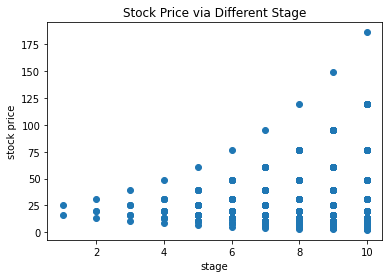

In [18]:
plt.scatter(tree['depth'], tree['price'])
plt.xlabel('stage')
plt.ylabel('stock price')
plt.title('Stock Price via Different Stage')

In [102]:
N_list = range(1, 10)
call_price_list = []
for N in N_list:
    call_price, _ = get_call_price(S, u, d, N, T, pi_u, pi_d, prob, res)
    call_price_list.append(call_price)

根据下图中结果可以看到，阶段数越高，看涨期权的价格越高，这是为什么呢？  
- 一方面，期权是有**存续时间**的，大部分期权可能最长都不超过1年，所以你预估10阶段的可能性不高
- 另一方面，我们也看出，期权的价格和其存续时间是显著正相关的

Text(0.5, 1.0, 'Call Price Valuation via Different Stage Tree')

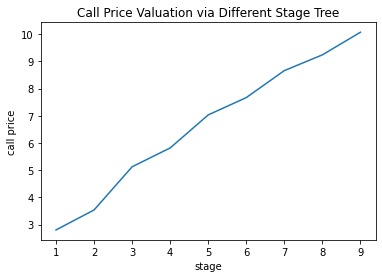

In [96]:
plt.plot(T_list, call_price_list)
plt.xlabel('stage')
plt.ylabel('call price')
plt.title('Call Price Valuation via Different Stage Tree')

如果一个期权只能在第二年行权，看来我们用二叉树计算估值倒也可以，但是期权中还有一大类是可以在任意时间行权的：
- 欧式期权只能在最后到期日行权，美式期权可以在到期日前任意交易时间行权

那么问题来了？我们如何对这种每时每刻都需要重新估值美式期权进行定价呢？或者说，我们如何更精确的估算1年内（1-stage）的期权的价格？  
很快我们类比了金融计算复利的方式，从而联想到微积分的方法：
- 我们可以将这个这1年不断拆细，拆成一个一个$\Delta t$，然后计算每个$\Delta t$时间的期权价值
- 可是随之而来的问题是，之前假设的$u, d, \pi_u, \pi_d$都要跟着调整，毕竟那是站在一年的时间假设的离散型变量

## 连续时间定价-BSM

BS写了论文，Merton也写了论文，前后差了没多久，都解出了微分方程，用了两种不同的方式

### 正态分布

- https://www.bilibili.com/video/BV1kv411r7UD  
高尔顿板、小球，二项分布->正态分布，杨辉三角

如何用二项分布取极限推得正态分布函数？ - Momona Yang的回答 - 知乎
https://www.zhihu.com/question/276928259/answer/468771734

 棣莫弗的二项概率逼近 https://blog.51cto.com/u_15294985/3012894

In [33]:
def get_price_tree(S, u, d, N, T, pi_u, pi_d, prob, res):
    Su = S + u
    Sd = S + d
    Pu = prob * pi_u
    Pd = prob * pi_d
    # 存储递归过程中的结果
    res.append({'price': Su, 'depth': T, 'prob': Pu})
    res.append({'price': Sd, 'depth': T, 'prob': Pd})
    if T < N:
        # 递归计算，传入不同值
        get_price_tree(Su, u, d, N, T+1, pi_u, pi_d, Pu, res)
        get_price_tree(Sd, u, d, N, T+1, pi_u, pi_d, Pd, res)
res = []
get_price_tree(S, u, d, N, T, pi_u, pi_d, prob, res)
tree_pandas = pd.DataFrame(res)

Text(0.5, 1.0, 'Stock Price via Different Stage')

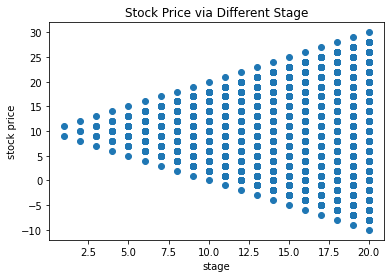

In [34]:
plt.scatter(tree_pandas['depth'], tree_pandas['price'])
plt.xlabel('stage')
plt.ylabel('stock price')
plt.title('Stock Price via Different Stage')

In [42]:
import numpy as np

In [48]:
def get_final_price(S, N, delta):
    return S + np.random.choice([delta, -delta], N, [0.5, 0.5]).sum()

<BarContainer object of 37 artists>

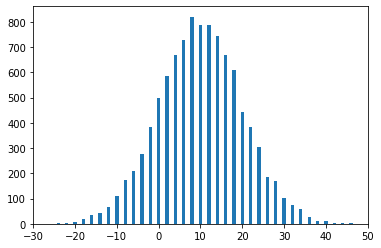

In [83]:
price_list = []
for i in range(10000):
    price_list.append(get_final_price(10, 100, 1))
price_dist = pd.Series(price_list).value_counts()
plt.bar(price_dist.index, price_dist.values)

### 马尔科夫过程

标的变量未来的预测仅仅与标的变量的当前值有关，变量的历史值以及变量从过去到现在的演变方式与未来的预测均无关

举例：
- 被切除大脑失去记忆的白鼠
- 过去的股票价格不会影响未来股价的预测（在确定股票价格所服从的随机过程特性时，其历史数据的统计特性如波动率也许有用，这里仅仅是说明股票的未来价格与过往价格无关）

### 维纳过程

TODO：视频

维纳过程是是期望值为0,、方差为1的特殊的马尔科夫过程，曾在物理学中用来描述一个粒子受到大量小分子碰撞后所产生的的运动  
该现象最早是由苏格兰植物学家罗伯特·布朗在观察花粉以及其他悬浮微小颗粒在水中不停地做不规则的曲线运动时发现的，所以这种运动也被称为布朗运动

- 性质1：变量$x$在瞬时$\Delta t$的变换量$\Delta x$满足等式：$\Delta x = \varepsilon \sqrt{\Delta t}$  
其中$\varepsilon$服从标准正态分布$N(0,1)$，同时$\Delta t$可以视为常数，因此$\Delta t$也服从$N(0,\sqrt{\Delta t})$
- 性质2：在任何两个不相重叠的$\Delta t$时间内，变化量$\Delta x$之间是相互独立的，这个性质就说明变量$x$服从马尔科夫过程

接着考虑在一段相对较长时间区间$T$内变量$x$的变化，这里将变化量表述为$x_T - x_0$，可以看成是$N$个区间长度为$\Delta t$的$x$变化量总和：  
$x_T - x_0 = \sum_{i=1}^N\varepsilon_i\sqrt{\Delta t}$，其中$N=T/\Delta t$,$\varepsilon_i$依然服从标准正态分布  
由于性质2，所以不同的$\varepsilon_i$之间是相互独立的，因此$\sum_{i=1}^N\varepsilon_i\sqrt{\Delta t}$的标准差为$\sqrt{N \Delta t} = \sqrt{T}$，所以整体服从服从$N(0,\sqrt{T})$的分布

在随机过程中，在每单位时间$\Delta t$内变量变化的期望值称为变量的漂移率(drift rate)，变化的方差称为变量的方差率(variance rate)，因此维纳过程的漂移率为0、方差率为1   
漂移率意味着在将来任意时刻变量$x$的期望值等于其当前值；方差率等于1意味着在任意长度为$T$的时间区间内，$x$变化的方差等于$T$

### 广义维纳过程

TODO：为什么要有广义维纳过程？

如果变量$y$服从广义维纳过程，则可以表示为：$dy = adt+bdx$，其中$a、b$均为常数  

- 等式右边的$adt$说明变量$y$在单位时间$\Delta t$内的漂移率为$a$，如果忽略$bdx$，后面的项目则退化为：$dy = adt$  
积分可得$y = y_0 + at$，其中$y_0$是$y$在$t=0$时刻的$y$的初始值，$at$说明经过了时间$T$以后变量$y$的增量就是$aT$
- 等式右边的$bdx$可以被看成附加在变量$y$路径上的噪声，幅度为维纳过程的$b$倍，由于维纳过程的标准差为1，则b倍维纳过程在单位时间内的的方差率就等于$b^2$  
因此广义维纳过程的漂移率为$a$，方差率为$b^2$  

通过离散化表达，可以得到：$\Delta y = a\Delta t + b\varepsilon \sqrt{\Delta t}$，进而得到$\Delta y $服从$N(a\Delta t, b\sqrt{\Delta t})$  
此外根据维纳过程的性质2，则可以得到$y_T-y_0$也服从$N(aT, b\sqrt{T})$的分布

### 股票价格和几何布朗运动

- https://www.bilibili.com/video/BV1kb4y1d71U   
1827布朗，1905爱因斯坦证明。水分子对花粉的不同方向的撞击个数和冲击力不同，导致悬浮微粒的不规则运动  
记录运动轨迹，发现是无规则的，升高温度会发生什么？和扩散现象类似，温度越高无规则越剧烈  
只有显微镜下才能看到悬浮微粒，微粒大小要在微米数量级，太大各方向的撞击效果会被抵消，体积大的质量也变大，每次撞击的速度变化也几乎为零    
纸棒点燃可以看到烟雾颗粒的布朗运动，雾霾的PM2.5在空气也是布朗运动
- 类比：股票价格被信息冲击，越是大公司的股价波动率越低，除非信息冲击足够大

TODO：视频

- 股票价格是否具备不变的漂移率$a$和不变的方差率$b^2$？  
广义维纳过程违背了投资者要求的预期收益率而不是股票价格的事实，比如预期收益率为20%，股价为5元则股价漂移率为$a$=1元/股，股价为10元则股价漂移率为$a$=2元/股  

- 股票收益率的期望值作为常数更合理 - 漂移率$a$  
股票价格为$S$，股价的漂移率可以是$\mu S$，其中$\mu $是股票收益率的期望值，并且是常数，根据广义维纳过程的结论，这意味着在单位时间$\Delta t$内股价的期望增量为$\mu S\Delta t$

- 合理的假设：无论股价多少，在一个较短时间$\Delta t$内股票收益率的波动率都是相同的 - 方差率$b^2$  
无论股价多少，投资者对股票收益率的波动率(不确定性)持有相同的预期，所以在较短时间$\Delta t$股票价格的标准差应该与股票价格成正比

因为得出股票价格服从随机过程模拟：$dS = \mu Sdt + \sigma Sdx$  
等式两边同除以$S$，可以得到：$\frac{dS}{S} = \mu dt + \sigma dx$，其中参数$\mu$是股票收益率的期望值，参数$\sigma$是股票收益率的波动率  
这个式子是用于描述股票价格最广泛的一种随机模型，该模型被称为几何布朗运动  

离散形式为：$\frac{\Delta S}{S} = \mu \Delta t + \sigma \varepsilon \sqrt{\Delta t }$  
因此$\frac{\Delta S}{S}$服从$N(\mu \Delta t, \sigma \sqrt{\Delta t })$  
TODO ： 根据维纳过程的性质2，可以得到？？